Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=775204b7e44670648f7a5e50c3a1c5f339ff1c34b5abf0fc0015dbc6c9dd996b
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


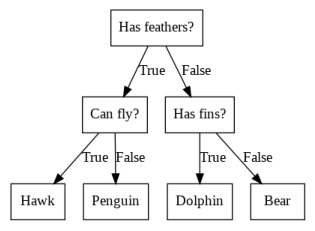

In [1]:
!pip install mglearn
import mglearn
mglearn.plots.plot_animal_tree()

In [2]:
import numpy as np
from sklearn.datasets import make_moons
import sklearn.tree as tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

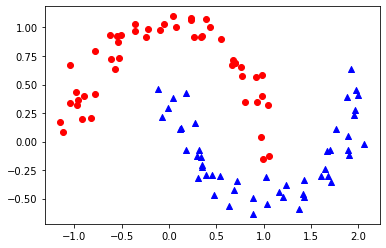

In [12]:
#subject2
X, y = make_moons(n_samples=100, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
plt.scatter(X[y == 0, 0], X[y == 0, 1],c='r', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1],c='b', marker='^')
plt.show()

In [13]:
decision_tree_classifier = tree.DecisionTreeClassifier(random_state=0, criterion="gini")
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

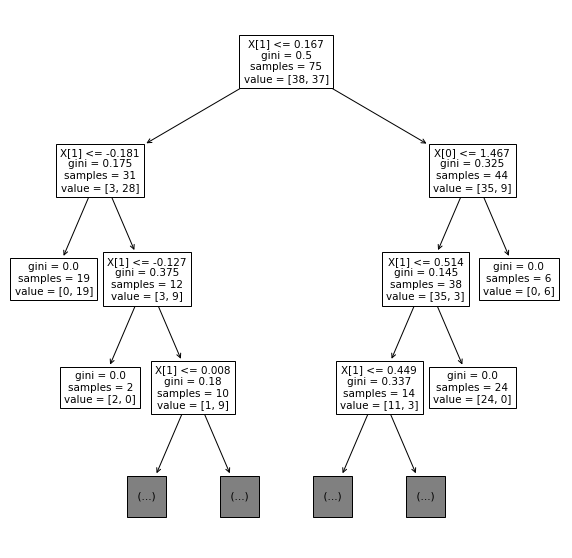

train accuracy : 1.0
test accuracy : 0.92


In [14]:
plt.figure(figsize=(10,10))
tree.plot_tree(decision_tree_classifier, max_depth=3)
plt.show()
print(f"train accuracy : {decision_tree_classifier.score(X_train, y_train)}")
print(f"test accuracy : {decision_tree_classifier.score(X_test, y_test)}")

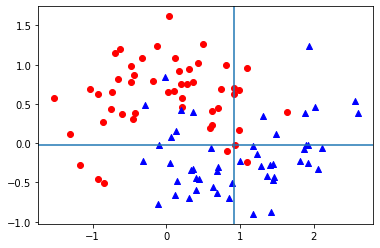

In [8]:
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='^')
thresholds = decision_tree_classifier.tree_.threshold

#x[0]はy軸と垂直方向, x[1]はx軸と垂直方向
plt.axhline(y=thresholds[0])
plt.axvline(x=thresholds[1] ,ymin=-1, ymax=thresholds[0])
plt.axvline(x=thresholds[7], ymin=thresholds[0], ymax=1.9)
#plt.axhline(y=0.853, xmin=0, xmax=0.771)
#plt.axvline(x=-1.021, ymin=0, ymax=0.53)
plt.show()

In [15]:
#subject3
cancer = load_breast_cancer()
cancer_tree_classifier = tree.DecisionTreeClassifier()

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [17]:
cancer_tree_classifier.fit(X_train, Y_train)
print(f"train accuracy : {cancer_tree_classifier.score(X_train, Y_train)}")
print(f"test accuracy : {cancer_tree_classifier.score(X_test, Y_test)}")

train accuracy : 1.0
test accuracy : 0.916083916083916


In [18]:
export_graphviz(cancer_tree_classifier, out_file="cancer_tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)
#impurity: Gini不純度を図に加える
#filled: 分岐におけるサンプル数によって色分けする

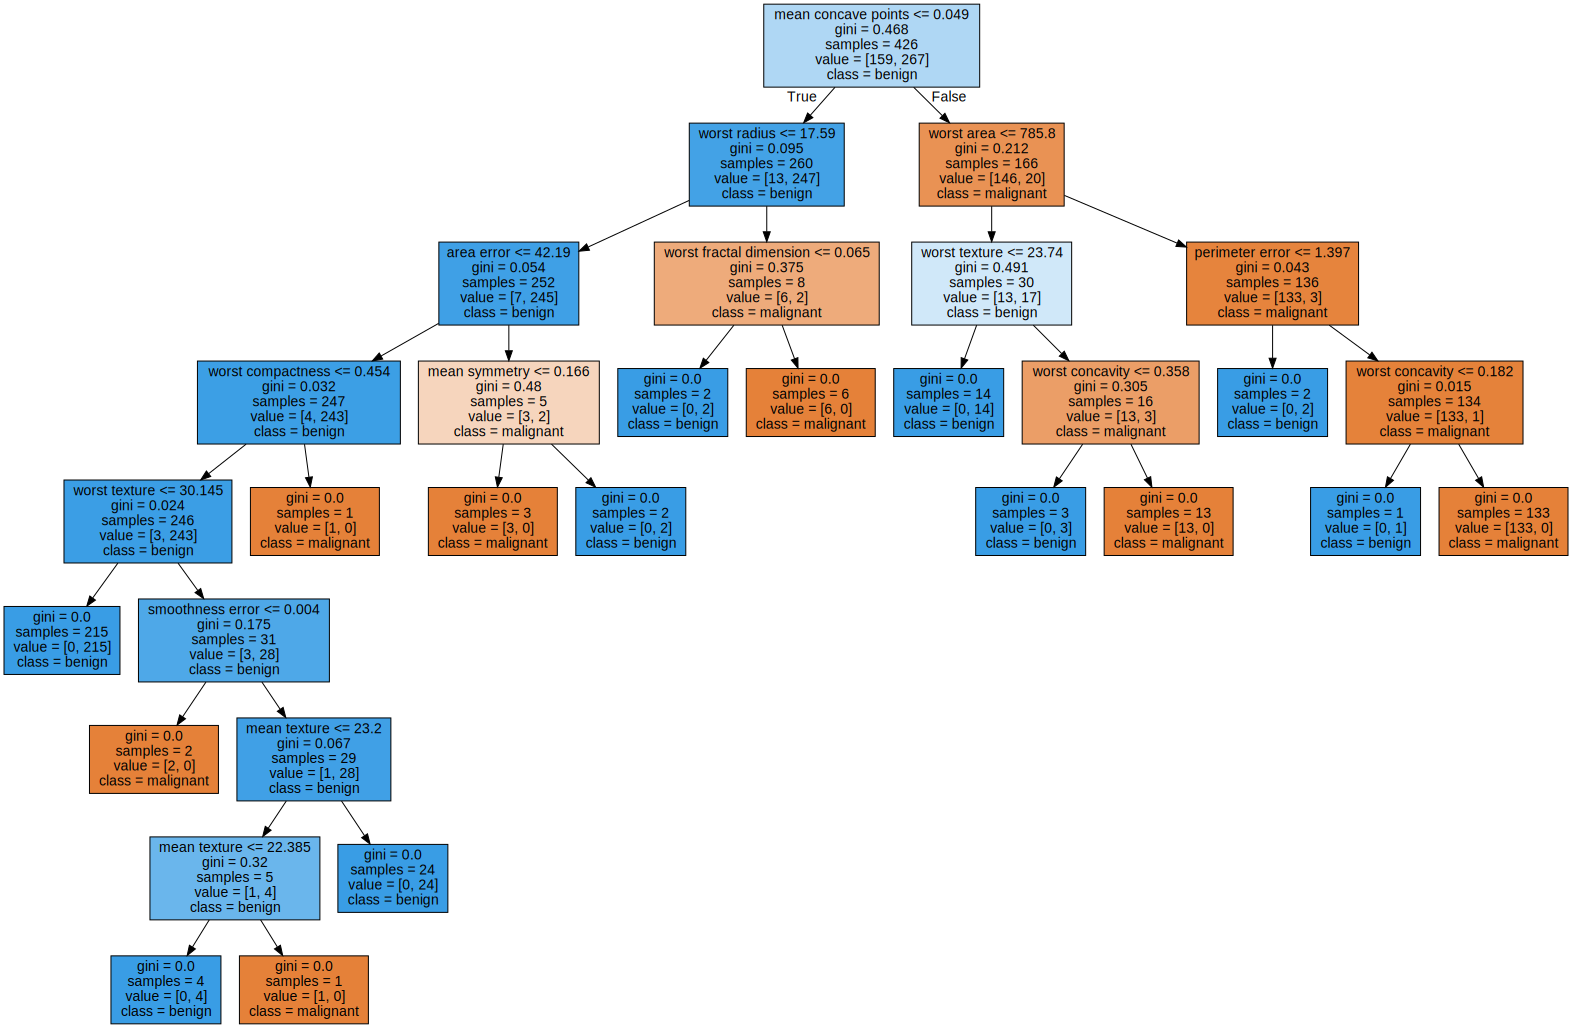

In [19]:
with open("cancer_tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)
#malignant:悪性, benign:良性
#with構文はfileの最初の処理と最後の処理を忘れずに行ってくれる

In [24]:
#subject4
cancer_tree_classifier = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
cancer_tree_classifier.fit(X_train, Y_train)
print(f"train accuracy : {cancer_tree_classifier.score(X_train, Y_train)}")
print(f"test accuracy : {cancer_tree_classifier.score(X_test, Y_test)}")
export_graphviz(cancer_tree_classifier, out_file="cancer_tree_prepruning.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

train accuracy : 0.960093896713615
test accuracy : 0.9370629370629371


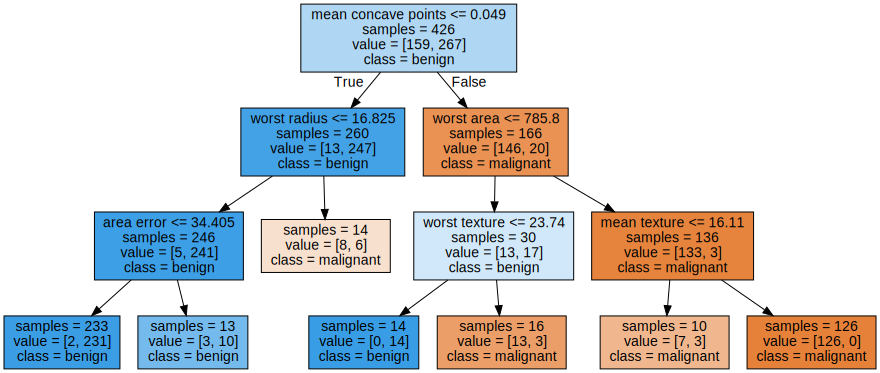

In [25]:
with open("cancer_tree_prepruning.dot") as f:
  dot_graph_prepruning = f.read()
graphviz.Source(dot_graph_prepruning)

In [26]:
#subject5
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.figure(figsize=(15,10))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.show()

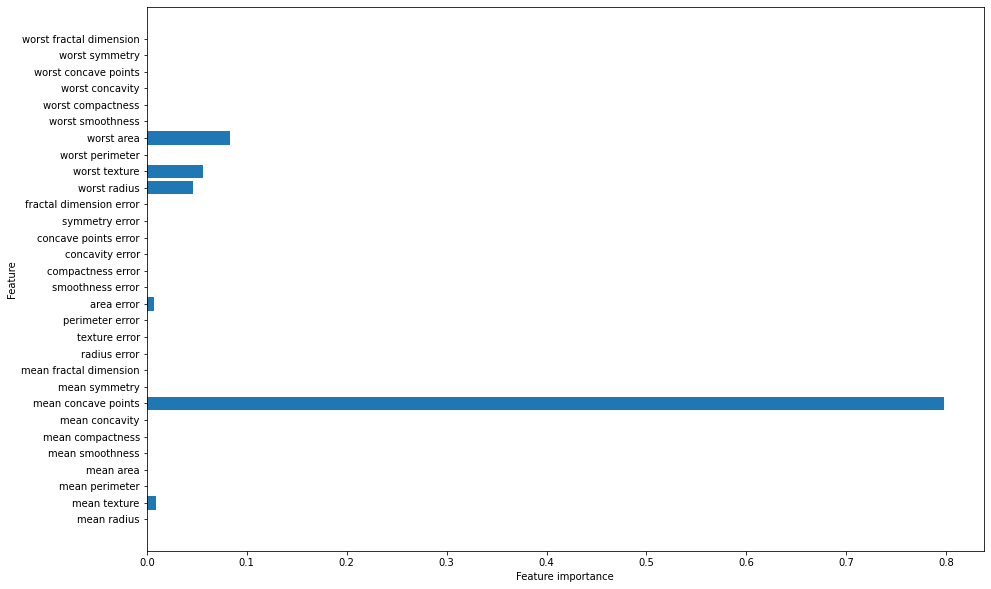

In [27]:
plot_feature_importances_cancer(cancer_tree_classifier)